In [ ]:
from statistics import mean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_ventas = pd.read_csv('/content/drive/MyDrive/Ironhack/pruebas_hyp/ventas_enero_2020.csv')

In [ ]:
df_ventas.head()

,ip,compra,fecha
0,0146.0104.0044.0034,0,2020-01-01
1,0166.0231.0189.0175,1,2020-01-01
2,0031.0086.0235.0176,0,2020-01-01
3,0128.0126.0101.0178,0,2020-01-01
4,0096.0176.0164.0068,0,2020-01-01


In [ ]:
df_ventas.tail()

,ip,compra,fecha
1495,0203.0217.0139.0057,1,2020-01-31
1496,0187.0069.0005.0041,0,2020-01-31
1497,0183.0227.0161.0014,0,2020-01-31
1498,0104.0051.0191.0088,0,2020-01-31
1499,0021.0128.0095.0043,0,2020-01-31


In [ ]:
df_ventas.compra

0       0
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    0
1498    0
1499    0
Name: compra, Length: 1500, dtype: int64

In [ ]:
df_ventas.compra.mean()

0.2846666666666667

In [ ]:
from scipy.stats import binom

In [ ]:
estimacionz_ventas = binom(100, df_ventas.compra.mean())

In [ ]:
y = [x for x in range(101)]

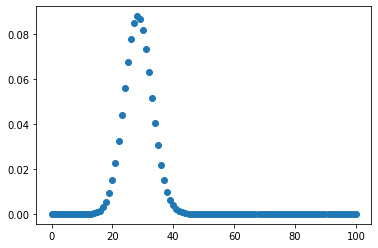

In [ ]:
plt.scatter(y, estimacionz_ventas.pmf(y))

In [ ]:
estimacionz_ventas.interval(0.99)

(17.0, 40.0)

In [ ]:
vinos = pd.read_csv('/content/drive/MyDrive/Ironhack/pruebas_hyp/winemag-data-130k-v2.csv')

In [ ]:
vinos.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [ ]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
vinos.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
vinos.head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
vinos.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


### Prueba Z

Es la manera estadística de probar nuestra hipótesis si:
* Conocemos la varianza de la población o
* No conocemos la varianza, pero nuestra muestra es $n>=30$ \\

Tenemos que \\

$Z =\frac{\bar x - \mu}{\frac {\sigma}{\sqrt n}}$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$\sigma $ = Desviación estándar de la población \\
$n $= Tamaño de la muestra

Ejemplo:

En este dataset de reviews de vinos, vamos a asumir que los datos  de puntaje de los vinos están distribuidos de forma
normal.
--->Points: The number of points WineEnthusiast rated the wine on a scale of 1-100<---

Entonces definimos nuestra media poblacional ($\mu$) y desviación estándar ($\sigma$). Estos serán nuestros
parámetros. Estamos asumiendo aquí que los datos que tenemos son los datos de la población, sin muestreo.

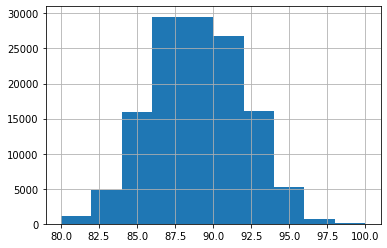

In [ ]:
vinos.points.hist()

In [ ]:
points = vinos.points
mu = vinos.points.mean()
sigma = vinos.points.std()

In [ ]:
print(f'mu: {mu}, sigma: {sigma}')

mu: 88.44713820775404, sigma: 3.0397302029162336


#Ejemplo
Suponiendo que tengo una muestra de n=10 puntajes de vinos con una media muestral de $\bar{x}$ = 90.2.
Esta muestra viene de la misma población que las evaluaciones que tengo aquí?

Para probar, vamos a utilizar una prueba z de 1 muestra. Primero, declaramos hipótesis nula e hipótesis alternativa:

$H_0$: La muestra es de la misma población de enólogos -> $\bar{x} = \mu$

$H_A$: La muestra no viene de la misma población de enólogos -> $\bar{x} \neq \mu$

Enseguida, específicamos qué nivel de significancia vamos a utilizar. En estadística, un nivel de signficancia común
es el de $\alpha \leq 0.05$. Vamos a comprobar utilizando un $\alpha = 0.05$

Luego, vamos a nuestra [tabla z] para buscar el valor crítico de z que corresponde con este nivel de significancia.
Nuestra prueba tendrá 2 colas porque no nos importa si la media muestral es mayor o menor que la media poblacional.
Solamente estamos probando si son iguales o diferentes.

[tabla z]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/z-two-tails.pdf



$Z =\frac{\bar x - \mu}{\frac {\sigma}{\sqrt n}}$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$\sigma $ = Desviación estándar de la población \\
$n $= Tamaño de la muestra

In [ ]:
z_test = 1.65
x_bar = 90.2
print(mu)
print(sigma)
n = 10

88.44713820775404
3.0397302029162336


In [ ]:
standard_error = sigma/np.sqrt(n)
z_stat = (x_bar - mu)/standard_error

In [ ]:
if z_stat < z_test:
  print(f'Valor de z:{z_stat}, menor que {z_test}\nNo podemos rechazar la hipotesis')
else:
  print(f'Valor de z:{z_stat}, mayor que {z_test}\n Podemos rechazar la hipotesis con confianza del 90%')

Valor de z:1.823528838731901, mayor que 1.65
 Podemos rechazar la hipotesis con confianza del 90%


In [ ]:
z_test

1.65

In [ ]:
z_stat

1.823528838731901

Calculamos el valor de z para nuestra media muestral comparada con la media poblacional dividiendo la diferencia
entre las dos medias entre la desviación estándar de la muestra, que es el error estándar: $\frac{\sigma}{\sqrt{n}}$.

Si este estadístico es menor que nuestro valor crítico de z, entonces no rechazamos la hipótesis nula; de
lo contrario, rechazamos la hipótesis nula en favor de la alternativa.

### Prueba T

En el ejercicio anterior, asumimos que conocemos la media y desviación estándar poblacional, entonces estamos
comparando nuestra muestra con esta población. Sin embargo, durante la mayoría de las veces no vamos a conocer estos
datos.

Nos permite medir nuestra hipótesis cuando:
* No conocemos la varianza de la población
* Nuestra muestra es pequeña, n < 30 

$t$ = $
\frac {\bar x - \mu}{\frac {s}{\sqrt n}}
$ \\
donde \\
$
\bar x $ = Media de la muestra \\
$\mu $= media de la población \\
$s $ = Desviación estándar de la muestra \\
$n $= Tamaño de la muestra



![alt text](https://andyjconnelly.files.wordpress.com/2017/05/distributions1.png 'Ejemplo Normal vs T-Student')

Entonces, si no conocemos los parámetros de nuestra población, pero sabemos que la distribución de nuestra muestra se
 asemeja a la normal (simétrica con tendencia a la media), lo más probable es que tengamos una distribución T de
 Student. En esta distribución, cuanto mayor la muestra, más similar a la normal será.

 La prueba T es calculada de forma semejante a la prueba z, pero está basada en esta distribución y por lo tanto
 tiene valores de referencia distintos.

### Prueba T de 1 Muestra

Supongamos que tengo una muestra y quiero comparar con un valor específico. En nuestro ejemplo, vamos a suponer que
yo sé que la evaluación promedio de los vinos en Francia es de 88, y quiero saber si los vinos nuevos ("Nouveau") tiene
una media de evaluación semejante a la población general. Voy a probar lo mismo con los vinos que están designados
como "Prestige"

En este caso, usamos una Prueba T de 1 sola muestra, ya que estamos comparando el valor de esta media con un valor de
 referencia (benchmark).

Nuestras hipótesis:

$H_0$: $\bar{x} - \mu = 0$ - es decir, no hay diferencia entre la media muestral y $\mu$.

$H_A$: $\bar{x} - \mu \neq 0$ - prueba de dos colas

$\alpha = 0.05$

Aquí veo en mi [tabla T]

[tabla T]: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf


---

In [ ]:
frances = vinos[vinos.country == "France"].points
fr_n = vinos[(vinos.country == "France")&(vinos.designation == 'Nouveau')].points

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


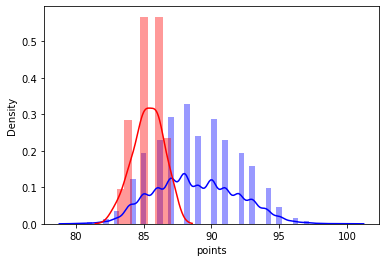

In [ ]:
plt.figure()
sns.distplot(frances, hist=True, color='b')
sns.distplot(fr_n, hist=True, color='r')

In [ ]:
stats.ttest_1samp(fr_n, frances.mean())

Ttest_1sampResult(statistic=-19.801986102576723, pvalue=6.082659615924452e-21)

In [ ]:
fr_n.mean()

85.32432432432432

In [ ]:
frances.mean()

88.84510931064138

In [ ]:
stats.ttest_1samp(fr_n, [frances.mean(),90,84,85])

Ttest_1sampResult(statistic=array([-19.8019861 , -26.29744932,   7.4484105 ,   1.82410053]), pvalue=array([6.08265962e-21, 4.27612910e-25, 8.54882059e-09, 7.64465206e-02]))

In [ ]:
.000764465206

# Two Sample Hypothesis Tests with Scipy

# Matched Pairs

Significa que los datos en las dos muestras son dependientes. (las dos muestras son dependientes, contienen al mismo grupo de personas)



In [ ]:
pen = pd.read_csv('/content/drive/MyDrive/Ironhack/pruebas_hyp/pinguinos.csv')

In [ ]:
pen.head()

,huevo_chico,huevo_grande
0,79,133
1,93,143
2,100,164
3,105,171
4,101,165


In [ ]:
from scipy.stats import ttest_rel, ttest_1samp

In [ ]:
ttest_rel(pen.huevo_chico, pen.huevo_grande)

Ttest_relResult(statistic=-39.6385073836747, pvalue=2.4963107834499585e-12)

In [ ]:
ttest_1samp(pen.huevo_chico-pen.huevo_grande, 0)

Ttest_1sampResult(statistic=-39.6385073836747, pvalue=2.4963107834499585e-12)

---
# Independent Samples

---



**Independent Samples**

Consideramos aquellos casos  en los que tenemos dos o más ejemplos que no hacen match entre ellos. Por ejemplo A/B test en páginas web dado que un usuario ve una interfaz diferente a los otros. 

Se deben cumplir ciertos estatutos:


1.   Independencia de los datos: Que un dato no afecte al otro
2.   Las muestras fueron tomadas aleatoriamente de una población que se distribuye normalmente

Podemos tener dos casos:


1.   Varianzas iguales 
2.   Varianzas diferentes

Nuesta hipótesis aquí son:

$
H_0 = \mu_1 = \mu_2 \\
H_1 = \mu_1 \neq \mu_2
$


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df_medi = pd.read_csv("/content/drive/MyDrive/Ironhack/pruebas_hyp/medicamentos.csv")

In [ ]:
df_medi.head()

,Sexo,Trat,Puntaje
0,Hombre,Control,10.155054
1,Hombre,Control,11.194200
2,Hombre,Control,11.759109
3,Hombre,Control,9.358012
4,Hombre,Control,11.300387


In [ ]:
df_medi.Trat.unique()

array(['Control', 'Trat1', 'Trat2'], dtype=object)

In [ ]:
df_medi.pivot_table(values = 'Puntaje', index='Trat', columns='Sexo')

Sexo,Hombre,Mujer
Trat,,
Control,10.824535,11.201002
Trat1,6.596051,5.140778
Trat2,7.688968,7.920856


In [ ]:
import seaborn as sns

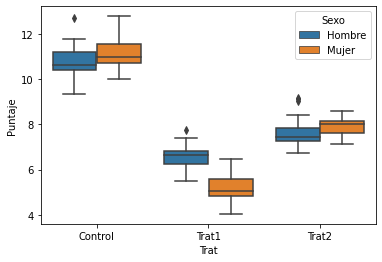

In [ ]:
sns.boxplot(x='Trat', y='Puntaje', hue='Sexo', data=df_medi)

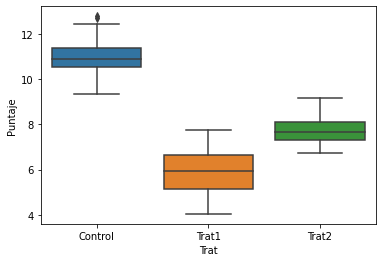

In [ ]:
sns.boxplot(x='Trat', y='Puntaje', data=df_medi)

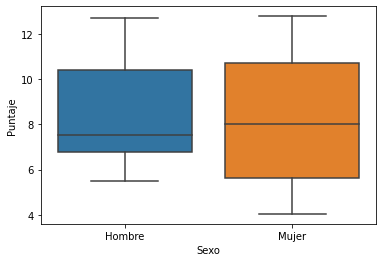

In [ ]:
sns.boxplot(x='Sexo', y='Puntaje', data=df_medi)

In [ ]:
a = df_medi[df_medi.Trat == 'Control'].Puntaje
b = df_medi[df_medi.Trat == 'Trat1'].Puntaje
c = df_medi[df_medi.Trat == 'Trat2'].Puntaje

In [ ]:
ttest_ind(c, a, equal_var = True)

Ttest_indResult(statistic=-21.460179196778043, pvalue=1.8271430334190028e-34)

In [ ]:
ttest_ind(c, a, equal_var = False)

Ttest_indResult(statistic=-21.460179196778043, pvalue=1.872769882605201e-33)

In [ ]:
ttest_ind(c, b, equal_var = False)

Ttest_indResult(statistic=11.01669065089112, pvalue=1.6805785065497578e-16)